In [1]:
from IPython.display import Image

# <a id="1.Summary"> 1.Summary</a>

Thank you for taking the time to complete Quora Data Challenge! We're excited about you continuing the interview process with us.

The data challenge simulates a typical experiment analysis you would be expected to work on at Quora. In this challenge, we will provide several datasets and ask you to analyze the results and provide product recommendations for a particular experiment. 

The Google form is not timed but we expect you to spend around 1-2 hours answering the questions. While working on these problems, please document your process and code in any tools you are comfortable with. They don't have to be very organized but should demonstrate your thinking. We will ask you to submit that at the end. Feel free to refer to any online resources if necessary.

Suppose you are a Data Scientist on the Mobile team at Quora. The team has just introduced a new UI design to the Quora app. The goal of the new design is to increase user engagement (measured by minutes spent on site). The team ran an A/B test to evaluate the change. Using the data, help the team understand the impact of the UI change better.

https://www.zhihu.com/question/20458233/answer/1724891055

A/B Testing isn't an useful testing as new experiences. There will be two trends, first is that people like old way and old experience, thats called change aversion. Second is thay they like new staff, so they don't attract by the change due to its convienent, instead they just explore the new feature when they first met new things and next time they will back to normal when they have explored everything. Thats called novelty effect.

what is going to be the plateaued experience so that i can actually make a robust decision.

Table Schema

t1_user_active_min.csv
This table contains active minutes data logged after experiment started(2019-02-06 to 2019-07-05).
Each row represents the total number of minutes spent on site for each user on a date.
If a user never visited the site for a given date, there wouldn't be data for that uid on that date. ( for 50000 user, there are 3376 users never logged in Feb to May time period )
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

t2_user_variant.csv
This table contains users’ treatment assignment.
Each row represents the assignment information for a unique user.
- uid: user ID
- variant_number: the experiment variant user is in. 0 for control, 1 for treatment
- dt: date when user entered the experiment, should be ‘2019-02-06’ for all users
- signup_date: the date string that user signed up on
  
t3_user_active_min_pre.csv
This table contains active minutes data before the experiment started.
It has a similar format as t1, except the dt range can extend before the experiment start date. ( '2018-08-10' to '2019-02-05' )
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

t4_user_attributes.csv
This table contains data about some user attributes.
Each row represents attributes of a unique user.
- uid: user ID
- user_type: segment that a user belongs to, measured by activity level of the user. Can be ‘new_user’, ‘non_reader’, ‘reader’ or ‘contributor’
- gender: user gender. Can be ‘male’, ‘female’ or ‘unknown’

In order to measure the experiment effect on user engagement, let's say you want to perform a t-test of the difference in minutes spent on site, what would be your unit of analysis (i.e. when conducting a t-test, we calculate means and variances of two samples. What does each data point represent in the samples?)? *

* <font color='red'>Total minutes per user in each group (number of data points in each group = number of users in that group)</font>
* Total minutes per user per day in each group (number of data points in each group = number of users in that group x number of days of the experiment)
* Total minutes per group per day (number of data points in each group = number of days of the experiment)

Why do you think the other choices are not correct? Hint: think of the key assumptions of running a t-test.
    
Total minutes per user per day in each group regard each datapoint as in individual independent happening 

we want to increase 'user' spend time increase or not.

<br>

Why do you think the other choices are not correct? Hint: think of the key assumptions of running a t-test. *

**For the t-test assumption, if the distribution are not normal distribution, we need to follow the assumption: the population variance are equal. For second part, the variance are differnet becuase each user login days are not equal. For thrid option, the two part have differnet users login per day. So their population variance won't be equal.**

Please enter the lower bound of your confidence interval (e.g. if the confidence Interval is [-1.00, 2.00], enter -1.00) = -38.591763263087756

Please enter the upper bound of your confidence interval (e.g. if the confidence Interval is [-1.00, 2.00], enter 2.00)  = 38.22913569692153

<font size=5>T-Test Assumptions</font>
1. The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.
2. The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
3. The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve. When a normal distribution is assumed, one can specify a level of probability (alpha level, level of significance, p) as a criterion for acceptance. In most cases, a 5% value can be assumed.
4. The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.
5. The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

N > 100 T-distribution equal to normal distribution

Initial hypothesis: change the UI from A to B will increase customer active minutes on this page 

Which metric to use?
* Total minutes per group? No, Total minues from Group A or Group B can not real reflct in impact
* Total minutes per user? No, We have two group, we need caculate active minutes by group classification
* Total minutes per user in each group? We split group into control group and experinment group. If we groupby 'uid', we got 40000 control group and 10000 experinment. The data points will be 40000: 10000
* Total minutes per user per day in each group? Further more, the data point will be each raw data point without any preprocess

If we envolve all user pre-experiment data, we might need to caculate the difference between different time and ratio of increase/all data point.

(unique user who increase time spend) / (unique users who accessd in this group)

# <a id="2.Table of Contents">2.Tabole of Contents</a>
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.Preprocess">Preprocess</a>
    <ul>
        <li><a href="#3.1 Hyperparameter">3.1 Hyperparameter</a></li>
        <li><a href="#3.2 Import Data">3.2 Import Data</a></li>
        <li><a href="#3.3 Clean Data">3.3 Clean Data</a></li> 
        <li><a href="#3.4 Tokenize">3.4 Tokenize</a></li> 
        <li><a href="#3.5 Label Processing">3.5 Label Processing</a></li>  
        <li><a href="#3.6 EDA">3.6 EDA</a></li>  
    </ul>
    </li>
    <li><a href="#4.Word2Vect">Word2Vect</a>
    <ul>
        <li><del><a href="#TFIDF">4.1 TFIDF</a></del></li>
        <li><del><a href="#Embedding">4.2 Embedding</a></del></li>
        <li><a href="#Glove Vector">4.3 Glove Vector</a></li>
        <li><a href="#BERT Vector">4.4 BERT Vector</a></li> 
        <li><a href="#Split and Compile">4.5 Split and Compile</a></li> 
    </ul>
    </li>
    <li><a href="#5.Classify">Classify</a></li>
    <li><a href="#6.Models">Models</a>
    <ul>
        <li><a href="#6.1 DNN">6.1 DNN</a></li>
        <li><a href="#6.2 CNN">6.2 CNN</a></li>
        <li><a href="#6.3 RNN">6.3 RNN</a></li>
        <li><a href="#6.4 BERT">6.4 BERT</a></li>
        <li><a href="#6.5 Seq2Seq">6.5 Seq2Seq</a></li>
        <li><a href="#6.9 Save">6.9 Save</a></li>
    </ul>
    </li>
    <li><a href="#7.Analysis and Plot">Analysis and Plot</a></li>
    <ul>
        <li><a href="#7.1 Analysis">7.1 Analysis</a></li>
        <li><a href="7.2 Spearmanr">7.2 Spearmanr</a></li>
    </ul>
    <li><a href="#8.Main Function">Main Function</a></li>
    <li><a href="#9.Test Code">Test Code</a></li>
</ol>

<br>

# <a id="3.Preprocess">3.Preprocess</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

# <a id="3.1 Hyperparameters">3.1 Hyperparameters</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [1]:
class HyperParameters(object):
    """:arg
    This class will be used to transmit hyperparameters between class.parameters
    Most of class can inherit this class and its hyperparameters
    
    
    
    
    """
    def __init__(self):
        """:arg



        """
        # we use this to test whether other class read HyperParameters() successfully
        self.TEST = 1

        # you can change this root path in this class and import_data() function will search from this root dictionary
        self.ROOTPATH = 'D:\\OneDrive\\03_Academic\\23_Github\\44_Quora_Data_Challenge\\03_data'

        # confidence inveral value
        self.ALPHA = 0.95

# <a id="3.2 Import Data">3.2 Import Data</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [2]:
from class_31_hyperparameters import HyperParameters

import pandas as pd
# measure running time
from time import time

import os


class ImportData(HyperParameters):
    """:arg


    """
    def __init__(self):
        """:arg
        """
        HyperParameters.__init__(self)

    def import_data(self):
        """:arg
        Use this function to complete import data process
        """
        print("*" * 50, "Start import data", "*" * 50)
        start_time = time()

        path_t1 = os.path.join(self.ROOTPATH, 't1_user_active_min.csv')
        path_t2 = os.path.join(self.ROOTPATH, 't2_user_variant.csv')
        path_t3 = os.path.join(self.ROOTPATH, 't3_user_active_min_pre.csv')
        path_t4 = os.path.join(self.ROOTPATH, '9999')
        
        df_t1 = pd.read_csv(path_t1)
        df_t2 = pd.read_csv(path_t2)
        df_t3 = pd.read_csv(path_t3)
        df_t4 = pd.read_csv(path_t4)

        return (df_t1, df_t2, df_t3, df_t4)


<br>

<br>

<br>

# <a id="3.3.EDA">3.3.EDA</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [3]:
from class_31_hyperparameters import HyperParameters

# use sns for visulization
import seaborn as sns
# numpy
import numpy as np
# solve statistical problem
from scipy import stats

class EDA(HyperParameters):
    """:arg
    Preproceess EDA



    """
    def __init__(self):
        """:arg
        """
        HyperParameters.__init__(self)

    def outlier_eda(self, df):
        """:arg
        We use several way to detect and remove outliers

        Args:
        -------
        df:DataFrame
            This can be data_t1 or data_t3. These two dataframe need ourlier detect and clean

        """
        # first we need to make sure this is outlier or error exist
        # we use boxplot() to demenstrate outliers
        sns.boxplot(x=df['active_mins'])
        # use z-score to eliminate outliers, the output is for indivudal data point
        z_score = np.abs(stats.zscore(df['active_mins']))
        # set a z-score threshold, any greater than this value will be eliminate
        z_threshold = 3
        print(z_threshold)
        # filter that ooutlier rows in dataframe
        index_outlier = np.where(z_score > z_threshold)
        # print out result
        print('We have {} data points are outliers'.format(len(index_outlier[0])))
        # drop these rows by index
        df = df.drop(index_outlier[0])

        return df


<br>

<br>

<br>

# <a id="3.4 Join Data">3.4 Join Data</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [4]:
from class_31_hyperparameters import HyperParameters

import pandas as pd
# test normal distribution
from scipy import stats

class JoinData(HyperParameters):
    """:arg
    """

    def __init__(self):
        """:arg
        """
        HyperParameters.__init__(self)

    def join_data_uid(self, df_t1, df_t2, df_t3, df_t4):
        """:arg
        We use function join to dataframe


        """
        # outer join df_t1 and df_t2 by uid
        df_t1t2 = pd.merge(df_t1, df_t2, on=['uid'], how='outer')
        # clean data drop NaN by row
        df_clean = df_t1t2.dropna(axis=0)
        # print clearn process
        print("Before {}, After {}".format(df_t1t2.shape[0], df_clean.shape[0]))
        # split into control group and treatment group and aggregate by user
        df_control = df_clean[df_clean['variant_number'] == 0].groupby(['uid'], as_index=False)['active_mins'].sum()
        # unit is total time spend per user per group, sometimes average or middle might have more meanning
        df_treat = df_clean[df_clean['variant_number'] == 1].groupby(['uid'], as_index=False)['active_mins'].sum()

        return df_clean, df_control, df_treat

    def join_data_group(self, df_t1, df_t2, df_t3, df_t4):
        """:arg
        We use function join to dataframe


        """
        # outer join df_t1 and df_t2 by uid
        df_t1t2 = pd.merge(df_t1, df_t2, on=['uid'], how='outer')
        # clean data drop NaN by row
        df_clean = df_t1t2.dropna(axis=0)
        # print clearn process
        print("Before {}, After {}".format(df_t1t2.shape[0], df_clean.shape[0]))
        # split into control group and treatment group and aggregate by user
        df_control = df_clean[df_clean['variant_number'] == 0].groupby(['dt_x'], as_index=False)['active_mins'].sum()
        # unit is total time spend per user per group, sometimes average or middle might have more meanning
        df_treat = df_clean[df_clean['variant_number'] == 1].groupby(['dt_x'], as_index=False)['active_mins'].sum()

        return df_clean, df_control, df_treat

    def join_data_dt(self, df_t1, df_t2, df_t3, df_t4):
        """:arg
        I choose the unit is 'Total minutes per user per day in each group.
        First, we split data into control (not chagne)  and treatment (changed) group
        Second, we aggregate data records (88197 / 34175) in each group by date(['dt_x']
        This meaning is, in this group, everyday the total minutes from user log in action
        Typically, we have different log in user number in this whole 150 experiment days.
        Third, we divide everyday total mintues by the number of user who log in this day.

        They we can test them with normal distribution. If you want to calculate t-test, our dataset need to
        be normal distribution (stats.shapiro(df))


        """
        # outer join df_t1 and df_t2 by uid
        df_t1t2 = pd.merge(df_t1, df_t2, on=['uid'], how='outer')
        # clean data drop NaN by row
        df_clean = df_t1t2.dropna(axis=0)
        # print clearn process
        print("Before {}, After {}".format(df_t1t2.shape[0], df_clean.shape[0]))
        # split into control group and treatment group and aggregate by user
        df_dt_control = df_clean[df_clean['variant_number'] == 0].groupby(['dt_x'], as_index=False)['active_mins'].sum()
        # unit is total time spend per user per group, sometimes average or middle might have more meanning
        df_dt_treat = df_clean[df_clean['variant_number'] == 1].groupby(['dt_x'], as_index=False)['active_mins'].sum()
        # we caculate how many user log in each day
        df_usr_control = df_clean[df_clean['variant_number']==0].groupby(['dt_x'], as_index=False)['uid'].count()
        # caculate how many user login each day in treatment group
        df_usr_treat = df_clean[df_clean['variant_number']==1].groupby(['dt_x'], as_index=False)['uid'].count()

        # (total minutes per day) / (number of users who login in each day)
        df_control = df_dt_control['active_mins'].divide(df_usr_control['uid'])
        df_treat = df_dt_treat['active_mins'].divide(df_usr_treat['uid'])

        print('For df_control, its normal distribution test is {}'.format(stats.shapiro(df_control)))
        print('For df_treat, its normal distribution test is {}'.format(stats.shapiro(df_treat)))

        return df_clean, df_control, df_treat



<br>

<br>

<br>

# <a id="3.5 Hypothesis">3.5 Hypothesis</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [32]:
from class_31_hyperparameters import HyperParameters

import numpy as np
import seaborn as sns
# this model will output degree of freedom
import statsmodels.stats.weightstats as st
from scipy import stats


class Hypothesis(HyperParameters):
    """:arg
    We use this class to calculate statical data and judge reject or accept hypothesis

    """
    def __init__(self):
        """:arg
        """
        HyperParameters.__init__(self)


    def ttest_ind(self, df_control, df_treat):
        """:arg


        Args:
        ------
        df_control:Series

        """
        print('Distribution of control group')
        sns.boxplot(x = df_control)
        sns.distplot(df_control)

        # caculate t-test for tow independtant dataset
        # because we caculate with total minutes, so the user rate 40000:10000 is imbalance
        # we need divide df_control with 4 to achieve same total minutes for 10000 users
        # t_value is t statical
        t_value, p_two, degree_free = st.ttest_ind(x1 = df_control
                                                   , x2 = df_treat
                                                   , usevar='unequal')
        # use a diiffernt function for t-test
        t_stat, p_value = stats.ttest_ind(df_control, df_treat, equal_var=False)
        # default confidence interval is 95%, so one side alpha = (1-95%)/2 = 0.025
        if (p_two < 1-self.ALPHA):
            print('P-value {} < {}'.format(p_two, 1-self.ALPHA))
            print('Reject H0 (control and treatment dont have siginificent differnet) hypothesis')
            print('Accept H1 (control and treatment have siginificent different) hypothesis')
        else:
            print('P-value {} > {}'.format(p_two, 1 - self.ALPHA))
            print('Accept H0 (control and treatment dont have siginificent differnet) hypothesis')
            print('Reject H1 (control and treatment have siginificent different) hypothesis')

        # start cacualte confidence interval (right tail=0.025) (two tail=0.05)
        # we have 150-200 data point, so when check t-distribution table,
        t_ci = stats.t.ppf(q = self.ALPHA, df=150)
        # sample number
        control_num = df_control.shape[0]
        treat_num = df_treat.shape[0]
        # cacualte stand diviation
        control_std = df_control.std()
        treat_std = df_treat.std()
        # cacualte se
        se = np.sqrt( np.square(control_std)/control_num + np.square(treat_std)/treat_num)
        #
        sample_mean = df_control.mean() - df_treat.mean()
        # calcuate confidenal interval
        upper_bound = sample_mean - t_ci * se
        lower_bound = sample_mean + t_ci * se
        print(upper_bound, lower_bound)

        return (t_value, p_two, degree_free, t_stat, p_value, upper_bound, lower_bound)





# <a id="7 Main Function">7 Main Function</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

************************************************** Start import data **************************************************
We have 172 data points are outliers
Before 1069597, After 1066230
For df_control, its normal distribution test is ShapiroResult(statistic=0.9935927987098694, pvalue=0.7472291588783264)
For df_treat, its normal distribution test is ShapiroResult(statistic=0.8703024983406067, pvalue=3.8012573644330416e-10)
Distribution of control group
P-value 3.032418523035919e-35 < 0.050000000000000044
Reject H0 (control and treatment dont have siginificent differnet) hypothesis
Accept H1 (control and treatment have siginificent different) hypothesis
-4.509893654334767 -3.665273229338887
OVER


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


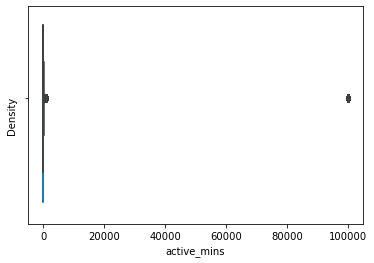

In [33]:
# from class_31_hyperparameters import HyperParameters
# from class_32_import_data import ImportData
# from class_33_eda import EDA
# from class_34_join_data import JoinData
# from class_35_hypothesis import Hypothesis


def main():
    """:arg
    All program running here by sequence

    1.import data
    2.Through EDA delete outliers
    3.Join data and split control and treatment

    """
    class_import = ImportData()
    (df_t1, df_t2, df_t3, df_t4) = class_import.import_data()

    class_eda = EDA()
    # clean df_t1 dataframe by deleting outliers
    df_t1 = class_eda.outlier_eda(df_t1)

    class_join = JoinData()
    # outer join t1 table and t2 table
    df_clean, df_control, df_treat = class_join.join_data_dt(df_t1, df_t2, df_t3, df_t4)

    class_hypo = Hypothesis()
    (t_value, p_two, degree_free
     , t_stat, p_value, upper_bound, lower_bound) = class_hypo.ttest_ind(df_control, df_treat)


    return (df_t1, df_t2, df_t3, df_t4, df_clean, df_control, df_treat
            , t_value, p_two, degree_free, t_stat, p_value, upper_bound, lower_bound)


if __name__=="__main__":
    """:arg
    """
    (df_t1, df_t2, df_t3, df_t4, df_clean, df_control, df_treat
     , t_value, p_two, degree_free, t_stat, p_value, upper_bound, lower_bound) = main()

    print('OVER')

# <a id="9.Test Code">9.Test Code</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [25]:
df_t3.shape

(1190093, 3)

In [27]:
df_t3.describe()

,uid,active_mins
count,1.190093e+06,1.190093e+06
mean,2.420589e+04,3.220315e+01
std,1.417999e+04,1.181531e+03
min,0.000000e+00,1.000000e+00
25%,1.197500e+04,2.000000e+00
50%,2.393200e+04,4.000000e+00
75%,3.619600e+04,1.400000e+01
max,4.999900e+04,9.999900e+04


In [28]:
df_t3

,uid,dt,active_mins
0,0,2018-09-24,3.0
1,0,2018-11-08,4.0
2,0,2018-11-24,3.0
3,0,2018-11-28,6.0
4,0,2018-12-02,6.0
...,...,...,...
1190088,49999,2018-09-15,5.0
1190089,49999,2018-09-26,8.0
1190090,49999,2018-10-20,29.0
1190091,49999,2018-12-14,3.0


In [23]:
upper_bound

-4.509893654334767

In [24]:
lower_bound

-3.665273229338887

In [8]:
df_control

0      19.893420
1      20.235027
2      20.529420
3      19.662953
4      20.119112
         ...    
145    19.716245
146    18.977998
147    19.840566
148    19.897338
149    19.860828
Length: 150, dtype: float64

In [10]:
df_control.describe()

count    150.000000
mean      19.323468
std        0.646480
min       17.732331
25%       18.895117
50%       19.278251
75%       19.836096
max       21.135562
dtype: float64

In [11]:
df_treat.describe()

count    150.000000
mean      23.411051
std        3.057468
min       18.758485
25%       21.385178
50%       22.300901
75%       24.437592
max       32.389844
dtype: float64

D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

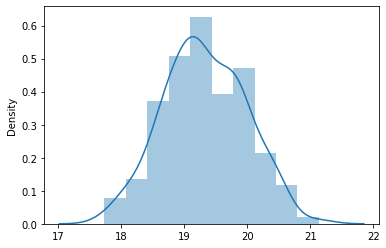

In [13]:
sns.distplot(df_control)

D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

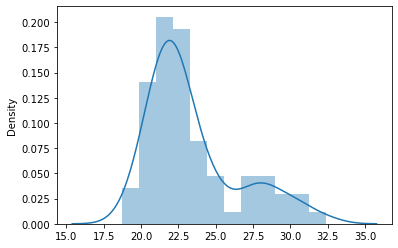

In [12]:
sns.distplot(df_treat)

In [9]:
df_treat

0      28.474670
1      27.436468
2      27.181484
3      26.838880
4      27.444191
         ...    
145    21.384615
146    21.485224
147    22.237192
148    21.462128
149    22.929389
Length: 150, dtype: float64

In [7]:
t_value, p_two, degree_free

(-16.019643876306674, 1.0, 162.29643381428605)

In [295]:
stats.t.ppf(q=0.975, df=25)

2.059538552753294

In [297]:
stats.t.ppf(q=0.95, df=200)

1.652508100910269

In [255]:
# caculate confidence internal right_tail =0.025 two_tail=0.05
t_ci = 1.971 
# sample number
control_num = df_21.shape[0]
treat_num = df_22.shape[0]

In [256]:
control_num

150

In [257]:
control_std = df_21.std()
treat_std = df_22.std()
se = np.sqrt( np.square(control_std)/control_num + np.square(treat_std)/treat_num)

sample_mean = df_21.mean() -  df_22.mean()
sample_mean

upper_bound = sample_mean - t_ci * se
lower_bound = sample_mean + t_ci * se

In [258]:
upper_bound, lower_bound

(-0.03298816640548901, -0.022860283394956115)

In [133]:
# caculate confidence internal right_tail =0.025 two_tail=0.05
t_ci = 1.971 
# sample number
control_num = df_control.shape[0]
treat_num = df_treat.shape[0]

In [134]:
control_std = df_control['active_mins'].std()

In [135]:
treat_std = df_treat['active_mins'].std()

In [136]:
se = np.sqrt( np.square(control_std)/control_num + np.square(treat_std)/treat_num)

In [141]:
df_control['active_mins'].mean(), df_treat['active_mins'].mean() 

(458.2211623246493, 458.4024761077324)

In [137]:
sample_mean = df_control['active_mins'].mean() -  df_treat['active_mins'].mean()
sample_mean

-0.1813137830831124

In [138]:
upper_bound = sample_mean - t_ci * se
lower_bound = sample_mean + t_ci * se

In [139]:
upper_bound

-38.591763263087756

In [140]:
lower_bound

38.22913569692153

In [210]:
# caculate confidence internal right_tail =0.025 two_tail=0.05
t_ci = 1.971 
t_ci = 2.60
# sample number
control_num = df_control.shape[0]/4
treat_num = df_treat.shape[0]
print(control_num, treat_num)

control_std = (df_control['active_mins']/4).std()
treat_std = df_treat['active_mins'].std()

se = np.sqrt( np.square(control_std)/control_num + np.square(treat_std)/treat_num)

(df_control['active_mins']/4).mean(), df_treat['active_mins'].mean() 

sample_mean = (df_control['active_mins']/4).mean() -  df_treat['active_mins'].mean()
sample_mean

upper_bound = sample_mean - t_ci * se
lower_bound = sample_mean + t_ci * se

upper_bound
lower_bound

37.5 150


2021.5178573516198

In [211]:
upper_bound


-1138.0278573516218

In [212]:
1639.3343468615546

1639.3343468615546

In [205]:
(df_control['active_mins']/4).mean()

28581.545

In [206]:
df_treat['active_mins'].mean()

28139.8

In [213]:
se

607.6049451352387

In [214]:
control_std

2650.8065794906283

In [215]:
(df_control['active_mins']/4).std()

2650.8065794906283

In [216]:
(df_control['active_mins']).std()

10603.226317962513

In [118]:
t_value, p_two, degree_free 

(-0.009303964709989936, 0.9925767506273644, 13920.469441655145)

In [573]:
df_treat.shape

(9208, 2)

In [20]:
p_value

3.0324185230356597e-35

In [19]:
stats.ttest_ind_from_stats(mean1=df_control.mean()
                           , std1=df_control.std()
                           , nobs1=150
                           , mean2=df_treat.mean()
                           , std2=df_treat.std()
                           , nobs2=150
                           , equal_var=False)

Ttest_indResult(statistic=-16.019643876306688, pvalue=3.03241852303566e-35)

In [15]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
import pandas as pd

def welch_ttest(x1, x2,alternative):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])

In [16]:
welch_ttest(df_control,df_treat,"equal")

,T statistic,df,pvalue 2 sided,Difference in mean,lb,ub
0,-16.019644,162.296434,3.032419e-35,-4.087583,-4.591446,-3.583721


In [17]:
upper_bound

-4.509893654334767

In [18]:
lower_bound

-3.665273229338887

In [487]:
stats.kstest(df_61['active_mins'], 'norm')

KstestResult(statistic=0.9616591299099563, pvalue=0.0)

In [492]:
df_52.head(2)

,uid,dt,active_mins
533200,23941,2019-02-20,1.0
264373,11922,2019-04-09,1.0


In [493]:
df_62 = df_52.groupby(['dt'], as_index=False)['active_mins'].sum()

In [494]:
stats.kstest(df_62['active_mins'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [331]:
st.kstest(df_42, 'norm')

KstestResult(statistic=0.8678963361749233, pvalue=0.0)

In [134]:
st.shapiro(dist_10)

ShapiroResult(statistic=0.9979808926582336, pvalue=0.2747354805469513)

In [129]:
st.shapiro(df_11)

ShapiroResult(statistic=0.0052002668380737305, pvalue=0.0)